#  Анализ бизнес-показателей приложения Procrastinate Pro+


Описание проекта.

В проекте нам предстоит проанализировать работу развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.

Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об посещениях,
- выгрузка покупок за этот период,
- рекламные расходы.

В рамках исследования будем изучать:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов,
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

In [1]:
import pandas as pd # импортируем библиотеки
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st
from statistics import variance 
from datetime import datetime, timedelta

In [2]:
# прочитаем csv-файлы
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')

In [3]:
def dataset_info(data): # Функция для ознакомления с датафреймом
    
    display(data.head()) # Выведем первые строки
    print('')
    display(data.info()) # Выведем основную информацию
    print('')
    display(data.describe()) # Расчитаем описательную статистику
    print('')
    display(data.isna().sum()) # Выведем количество пропущенных значений для каждого столбца
    print('=====================================================')
    print(len(data)- len(data.drop_duplicates())) # Подсчитаем количество повторяющихся строк в датафрейме
    print('')
    data.hist(figsize=(10, 8)); # Построим гистограмму для всех числовых столбцов таблицы на одном графике.

,User Id,Region,Device,Channel,Session Start,Session End
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


None

,User Id
count,3.099010e+05
mean,4.997664e+11
std,2.887899e+11
min,5.993260e+05
25%,2.493691e+11
50%,4.989906e+11
75%,7.495211e+11
max,9.999996e+11


User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

0



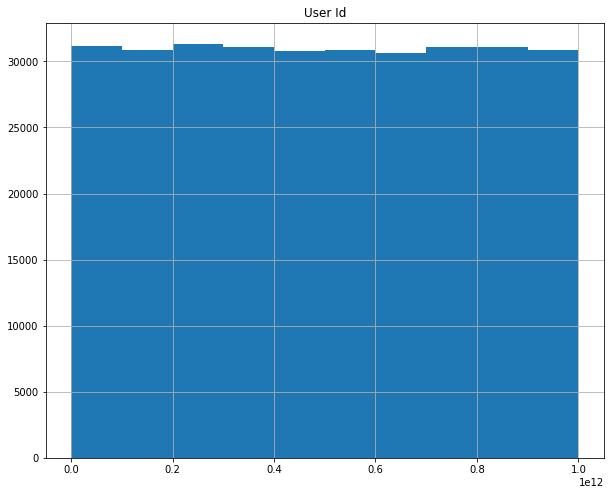

In [4]:
dataset_info(visits)

,User Id,Event Dt,Revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


None

,User Id,Revenue
count,4.021200e+04,40212.000000
mean,4.990295e+11,5.370608
std,2.860937e+11,3.454208
min,5.993260e+05,4.990000
25%,2.511324e+11,4.990000
50%,4.982840e+11,4.990000
75%,7.433327e+11,4.990000
max,9.998954e+11,49.990000


User Id     0
Event Dt    0
Revenue     0
dtype: int64

0



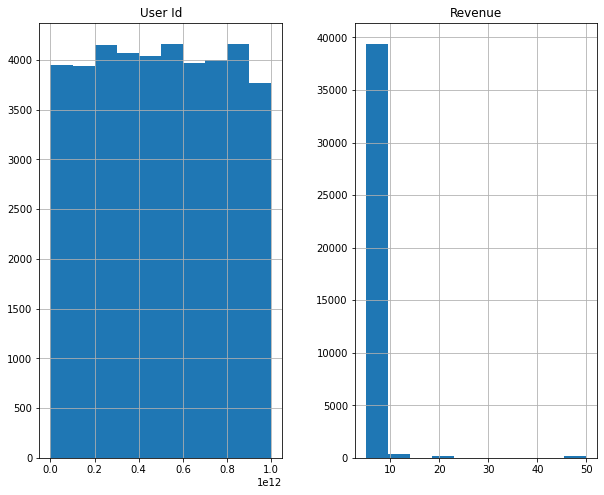

In [5]:
dataset_info(orders)

,dt,Channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


None

,costs
count,1800.000000
mean,58.609611
std,107.740223
min,0.800000
25%,6.495000
50%,12.285000
75%,33.600000
max,630.000000


dt         0
Channel    0
costs      0
dtype: int64

0



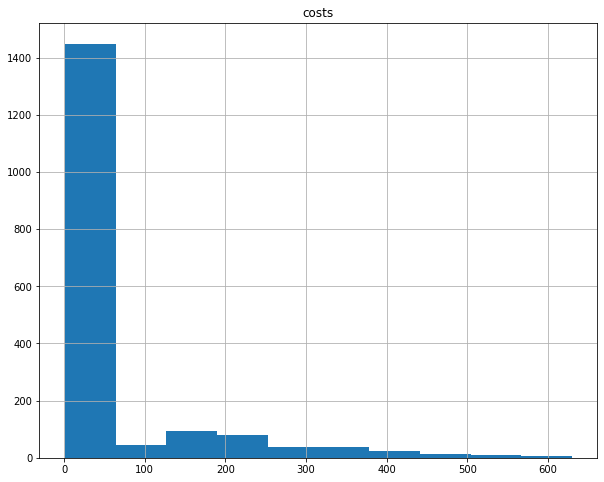

In [6]:
dataset_info(costs)

**Вывод:**

Датафрейм visits содержит 309 901 строк.

Название столбцов не соответствует единому стилю, необходимо привести всё к нижнему регистру, пробел заменить на нижнее подчёркивание. 

Изменить в столбцах Session Start и Session End тип данных.

Пропуски и дубли отсутствуют. 

Датафрейм orders содержит 40 212 строк.

Название столбцов не соответствует единому стилю, необходимо привести всё к нижнему регистру, пробел заменить на нижнее подчёркивание. 

Изменить в столбцe Event Dt тип данных.

Пропуски и дубли отсутствуют. 

Датафрейм costs содержит 1 800 строк.

Название столбцов не соответствует единому стилю, необходимо привести всё к нижнему регистру.

Изменить в столбцe dt тип данных.

Пропуски и дубли отсутствуют.

**Предобработка данных**

In [7]:
# Заменим названия столбцов (приведем к нижнему регистру и заменим пробел на нижнее подчёркивание)

visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')
print(visits.columns)
print('=============================================================')
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ', '_')
print(orders.columns)
print('=============================================================')
costs.columns = costs.columns.str.lower()
costs.columns = costs.columns.str.replace(' ', '_')
print(costs.columns)


Index(['user_id', 'region', 'device', 'channel', 'session_start',
       'session_end'],
      dtype='object')
Index(['user_id', 'event_dt', 'revenue'], dtype='object')
Index(['dt', 'channel', 'costs'], dtype='object')


**Датафрейм visits**

Пройдёмся по каждому столбцу

In [8]:
display(visits)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35
2,590706206550,United States,Mac,organic,2019-05-01 14:09:25,2019-05-01 15:32:08
3,326433527971,United States,Android,TipTop,2019-05-01 00:29:59,2019-05-01 00:54:25
4,349773784594,United States,Mac,organic,2019-05-01 03:33:35,2019-05-01 03:57:40
...,...,...,...,...,...,...
309896,329994900775,UK,PC,LeapBob,2019-10-31 13:28:12,2019-10-31 14:39:29
309897,334903592310,France,PC,lambdaMediaAds,2019-10-31 22:14:52,2019-10-31 22:39:36
309898,540102010126,Germany,PC,organic,2019-10-31 01:40:48,2019-10-31 01:41:31
309899,308736936846,Germany,Mac,organic,2019-10-31 07:37:34,2019-10-31 07:37:55


In [9]:
visits['user_id'].value_counts()

33606575057     46
943775408561    36
901180916748    35
870784569391    34
764086596354    33
                ..
350468480225     1
748123264144     1
909267360937     1
816252757222     1
425788122907     1
Name: user_id, Length: 150008, dtype: int64

In [10]:
visits['user_id'].describe()

count    3.099010e+05
mean     4.997664e+11
std      2.887899e+11
min      5.993260e+05
25%      2.493691e+11
50%      4.989906e+11
75%      7.495211e+11
max      9.999996e+11
Name: user_id, dtype: float64

In [11]:
visits['region'].value_counts()

United States    207327
UK                36419
France            35396
Germany           30759
Name: region, dtype: int64

In [12]:
visits['device'].value_counts()

iPhone     112603
Android     72590
PC          62686
Mac         62022
Name: device, dtype: int64

In [13]:
visits['channel'].value_counts()

organic               107760
TipTop                 54794
FaceBoom               49022
WahooNetBanner         20465
LeapBob                17013
OppleCreativeMedia     16794
RocketSuperAds         12724
YRabbit                 9053
MediaTornado            8878
AdNonSense              6891
lambdaMediaAds          6507
Name: channel, dtype: int64

In [14]:
visits['session_start'].value_counts()

2019-10-22 17:17:39    3
2019-05-19 06:19:20    3
2019-06-09 10:29:40    3
2019-10-15 09:47:57    3
2019-08-24 12:06:37    3
                      ..
2019-08-12 02:48:43    1
2019-06-15 15:53:16    1
2019-09-09 15:37:33    1
2019-06-10 09:08:45    1
2019-09-23 04:04:48    1
Name: session_start, Length: 306813, dtype: int64

In [15]:
# Изменим тип данных на datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])

In [16]:
visits['session_end'].value_counts()

2019-09-10 22:39:28    3
2019-08-03 10:18:44    3
2019-09-26 08:30:19    3
2019-08-03 06:31:26    3
2019-05-20 08:57:51    3
                      ..
2019-07-13 07:37:19    1
2019-07-25 19:34:31    1
2019-05-08 18:34:01    1
2019-09-01 02:18:52    1
2019-10-10 07:49:15    1
Name: session_end, Length: 306793, dtype: int64

In [17]:
# Изменим тип данных на datetime
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [18]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


**Вывод:**

Данные корректны, без дубликатов и пропусков, заменён тип данных в столбцах 'session_start' и 'session_end' на datetime

**Датафрейм orders**

Пройдёмся по каждому столбцу

In [19]:
display(orders)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99
2,529610067795,2019-05-01 11:34:04,4.99
3,319939546352,2019-05-01 15:34:40,4.99
4,366000285810,2019-05-01 13:59:51,4.99
...,...,...,...
40207,651604369137,2019-10-31 16:19:07,4.99
40208,275341387049,2019-10-31 01:17:17,4.99
40209,374656616484,2019-10-31 06:17:29,4.99
40210,168548862926,2019-10-31 22:46:19,4.99


In [20]:
orders['user_id'].value_counts()

901180916748    22
883098437811    20
75337957494     19
512471511263    19
295795879965    19
                ..
237296010927     1
319939546352     1
742075710598     1
202972423389     1
775233404832     1
Name: user_id, Length: 8881, dtype: int64

In [21]:
orders['user_id'].describe()

count    4.021200e+04
mean     4.990295e+11
std      2.860937e+11
min      5.993260e+05
25%      2.511324e+11
50%      4.982840e+11
75%      7.433327e+11
max      9.998954e+11
Name: user_id, dtype: float64

In [22]:
orders['event_dt'].value_counts()

2019-10-26 15:39:12    2
2019-09-01 08:06:14    2
2019-09-01 00:17:01    2
2019-06-17 05:14:58    2
2019-07-12 02:59:23    2
                      ..
2019-10-07 11:28:49    1
2019-10-14 18:59:40    1
2019-10-27 19:16:29    1
2019-09-10 18:26:19    1
2019-09-16 16:50:38    1
Name: event_dt, Length: 40163, dtype: int64

In [23]:
# Изменим тип данных на datetime
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [24]:
orders['revenue'].value_counts()

4.99     38631
5.99       780
9.99       385
49.99      212
19.99      204
Name: revenue, dtype: int64

In [25]:
orders['revenue'].describe()

count    40212.000000
mean         5.370608
std          3.454208
min          4.990000
25%          4.990000
50%          4.990000
75%          4.990000
max         49.990000
Name: revenue, dtype: float64

**Вывод:**

Данные корректны, без дубликатов и пропусков, заменён тип данных в столбце 'event_dt' на datetime

**Датафрейм costs**

Пройдёмся по каждому столбцу

In [26]:
display(costs)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1
2,2019-05-03,FaceBoom,85.8
3,2019-05-04,FaceBoom,136.4
4,2019-05-05,FaceBoom,122.1
...,...,...,...
1795,2019-10-23,lambdaMediaAds,4.0
1796,2019-10-24,lambdaMediaAds,6.4
1797,2019-10-25,lambdaMediaAds,8.8
1798,2019-10-26,lambdaMediaAds,8.8


In [27]:
costs['dt'].value_counts()

2019-09-08    10
2019-07-22    10
2019-05-12    10
2019-07-05    10
2019-10-10    10
              ..
2019-07-20    10
2019-05-27    10
2019-09-10    10
2019-10-03    10
2019-07-30    10
Name: dt, Length: 180, dtype: int64

In [28]:
# Изменим тип данных на datetime
costs['dt'] = pd.to_datetime(costs['dt']).dt.date

In [29]:
costs['channel'].value_counts()

TipTop                180
YRabbit               180
RocketSuperAds        180
lambdaMediaAds        180
MediaTornado          180
OppleCreativeMedia    180
WahooNetBanner        180
AdNonSense            180
FaceBoom              180
LeapBob               180
Name: channel, dtype: int64

In [30]:
costs['costs'].value_counts()

6.40      26
3.36      21
9.60      20
16.80     19
4.32      17
          ..
217.80     1
186.20     1
176.70     1
273.00     1
55.00      1
Name: costs, Length: 608, dtype: int64

In [31]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

**Вывод:**

Данные корректны, без дубликатов и пропусков, заменён тип данных в столбце 'dt' на datetime

**Вывод по предобработке данных:**

- привели названия столбцов к нижнему регистру, заменили пропуски на нижнее подчёркивание
- изменили тип данных в столбцах с датой на datetime

Представлено три датасета с данными о визитах, заказах пользователей и расходах на рекламу  с 1 мая по 27 октября 2019 год.

Информация собрана по странам: United States, UK,France и Germany.

С устройств: iPhone, Android, PC и Mac. 


### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

**Функция для создания пользовательских профилей**

In [32]:
def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

**Функция для расчёта удержания**

In [33]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

**Функция для расчёта конверсии**

In [34]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

**Функция для расчёта LTV и ROI**

In [35]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

**Функция для сглаживания фрейма**


In [36]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

**Функция для визуализации удержания**

In [37]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

**Функция для визуализации конверсии**

In [38]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Функция для визуализации LTV и ROI**

In [39]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Вывод:**

Созданы функции для расчёта и анализа LTV, ROI, удержания и конверсии.


### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

In [40]:
# получаем профили пользователей

profiles = get_profiles(visits, orders, costs)
profiles.head(5)

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [41]:
# момент анализа
observation_date = profiles['dt'].max()
observation_date

datetime.date(2019, 10, 27)

In [42]:
# горизонт анализа 
horizon_days = 14

In [43]:
# минимальная дату привлечения
min_analysis_date = profiles['dt'].min()
min_analysis_date

datetime.date(2019, 5, 1)

In [44]:
# максимальная дату привлечения
max_analysis_date =  observation_date - timedelta(days=horizon_days-1)
max_analysis_date

datetime.date(2019, 10, 14)

**Вывод**

Есть данные о пользователях с 01.05.2019 по 27.10.2019.
Горизон анализа - 14 дней, т.к. пользователи должны окупаться не позднее чем через две недели после привлечения.
Включать в анализ можно только пользователей, пришедших не позднее 14.10.2019

In [45]:
# страны и платящие пользователи
country_payment = profiles.groupby('region').agg({'user_id': 'count', 'payer': 'sum'}).sort_values(by='user_id', ascending=False)
country_payment['percent_payment'] = country_payment['payer']/country_payment['user_id']*100
country_payment

,user_id,payer,percent_payment
region,,,
United States,100002,6902,6.901862
UK,17575,700,3.982930
France,17450,663,3.799427
Germany,14981,616,4.111875


Для наглядности построим диаграммы

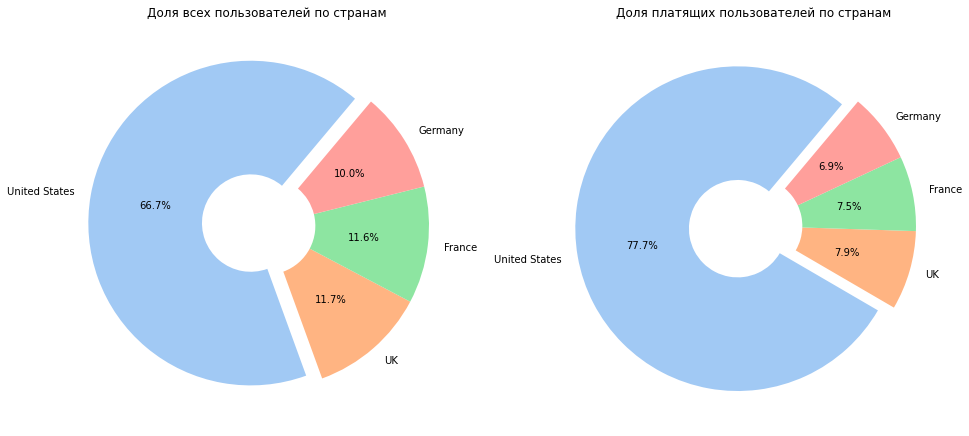

In [46]:
colors = sns.color_palette('pastel')[ 0:5 ]
explode = (0.1, 0, 0, 0)

fig, axs = plt.subplots(1, 2, figsize=(16, 9))
labels1 = country_payment['user_id'].index
labels2 = country_payment['payer'].index

(axs[0].pie(country_payment['user_id'], labels=labels1, autopct='%1.1f%%', startangle=50, colors = colors, 
            wedgeprops=dict(width=0.7), explode= explode))
axs[0].set_title('Доля всех пользователей по странам')


(axs[1].pie(country_payment['payer'], labels=labels2, autopct='%1.1f%%', startangle=50, colors = colors, 
            wedgeprops=dict(width=0.7), explode= explode))
axs[1].set_title('Доля платящих пользователей по странам');

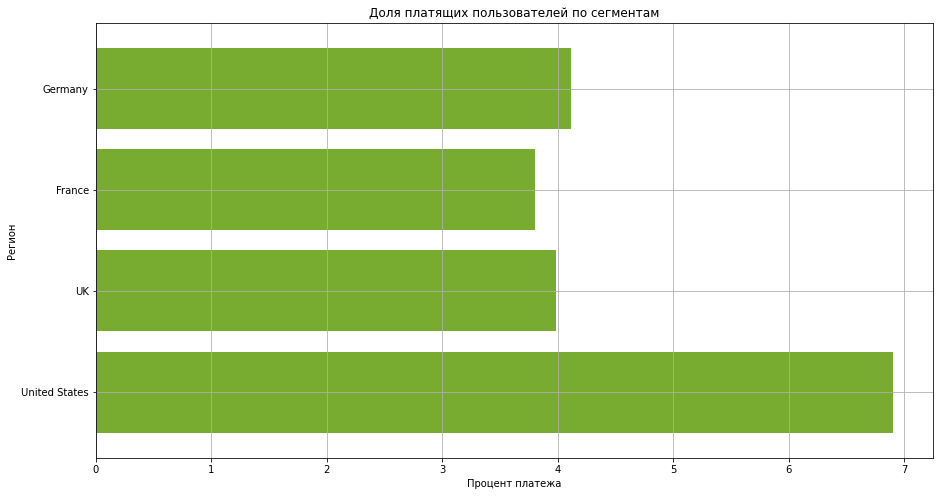

In [47]:
country_payment['percent_payment'].plot(kind='barh', figsize=(15, 8), width=0.8, color='#77AC30')
plt.grid()
plt.xlabel('Процент платежа');
plt.ylabel('Регион');
plt.title('Доля платящих пользователей по сегментам');

**Вывод**

Максимальная доля пользователей из США - 66,7 %. Пользователи из Великобритании, Франции и Германии составлют 10-11,7 %. 

Ситуация с платящими пользователями аналогичная. Платящих пользователей больше всего из США - 77,7 %. Остальные страны примерно одинаковая доля - 6,9 - 7,9%.

Процент платящих пользователей не велик. Чаще всего плать пользователи  США - 6,9 %, реже из Франции - 3,8 %.

**Новый вывод:**

Пользователи по регионам распределены следующим образом:

- США - 66,7%
- Великобритания - 11,7%
- Франция - 11,6%
- Германия - 10,%

Процент платящих пользователей от общего числа пользователей по каждому региону составляет:

- США - 6.9%
- Великобритания - 3.9%
- Франция - 3.7%
- Германия - 4.1%

Больше всего пользователей из США. Чаще всего так же платят пользователи из США. 


In [48]:
# тип устройства и платящие пользователи
device_payment = profiles.groupby('device').agg({'user_id': 'count', 'payer': 'sum'}).sort_values(by='user_id', ascending=False)
device_payment['percent_payment'] = device_payment['payer']/device_payment['user_id']*100
device_payment

,user_id,payer,percent_payment
device,,,
iPhone,54479,3382,6.207897
Android,35032,2050,5.851793
PC,30455,1537,5.046790
Mac,30042,1912,6.364423


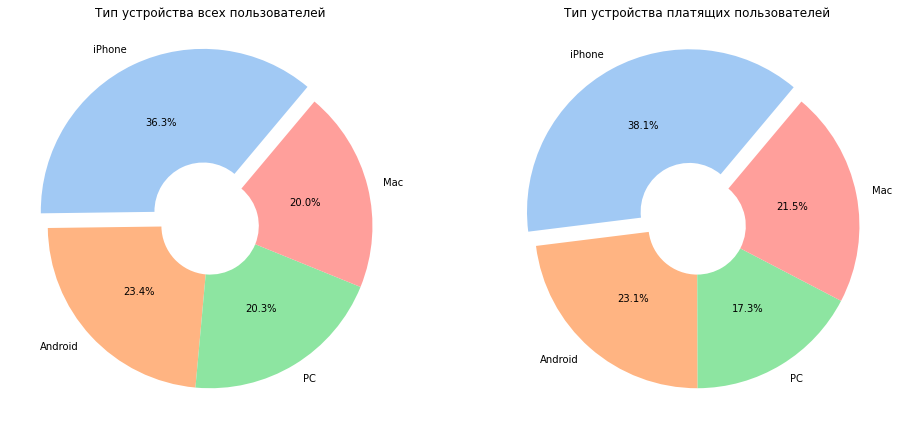

In [49]:
colors = sns.color_palette('pastel')[ 0:5 ]
explode = (0.1, 0, 0, 0)

fig, axs = plt.subplots(1, 2, figsize=(16, 9))
labels1 = device_payment['user_id'].index
labels2 = device_payment['payer'].index

(axs[0].pie(device_payment['user_id'], labels=labels1, autopct='%1.1f%%', startangle=50, colors = colors, 
            wedgeprops=dict(width=0.7), explode= explode))
axs[0].set_title('Тип устройства всех пользователей')


(axs[1].pie(device_payment['payer'], labels=labels2, autopct='%1.1f%%', startangle=50, colors = colors, 
            wedgeprops=dict(width=0.7), explode= explode))
axs[1].set_title('Тип устройства платящих пользователей');

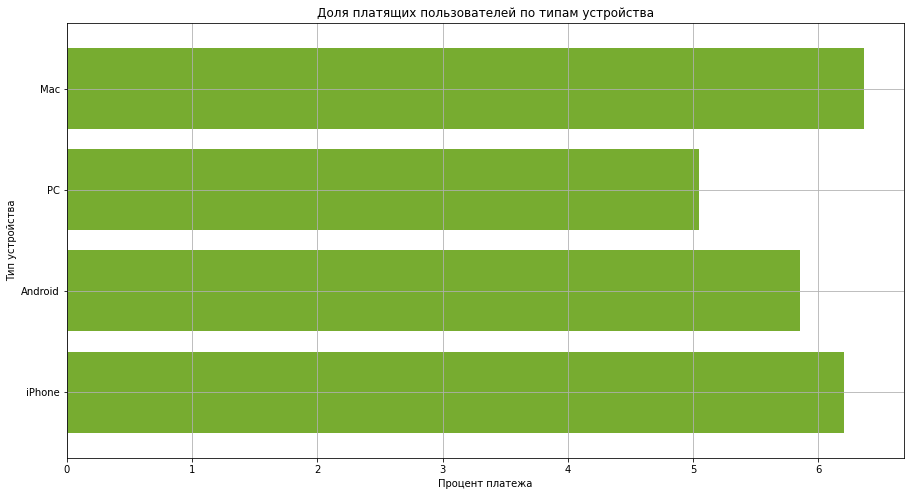

In [50]:
device_payment['percent_payment'].plot(kind='barh', figsize=(15, 8), width=0.8, color='#77AC30')
plt.grid()
plt.xlabel('Процент платежа');
plt.ylabel('Тип устройства');
plt.title('Доля платящих пользователей по типам устройства');

**Вывод**

Максимальная доля пользователей использует iPhone - 36.3 %. Пользователи с устройствами Android, PC и Mac составляют - 20-23,4 %. 

Ситуация с платящими пользователями аналогичная. Платящие пользователи чаще используют iPhone - 38,1 %. Остальные устройства составляют почти одинаковую долю  - 17,3-23,1%

Процент платящих пользователей на всех типах устройств одинаков 5-6% от общего числа. 

In [51]:
# каналы и платящие пользователи
channel_payment = profiles.groupby('channel').agg({'user_id': 'count', 'payer': 'sum'}).sort_values(by='user_id', ascending=False)
channel_payment['percent_payment'] =  channel_payment['payer']/ channel_payment['user_id']*100
channel_payment


,user_id,payer,percent_payment
channel,,,
organic,56439,1160,2.055316
FaceBoom,29144,3557,12.204914
TipTop,19561,1878,9.600736
OppleCreativeMedia,8605,233,2.707728
LeapBob,8553,262,3.063253
WahooNetBanner,8553,453,5.296387
RocketSuperAds,4448,352,7.913669
MediaTornado,4364,156,3.574702
YRabbit,4312,165,3.826531


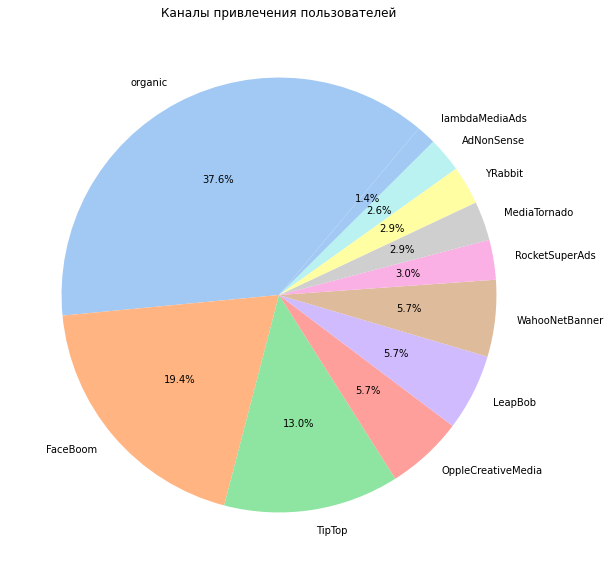

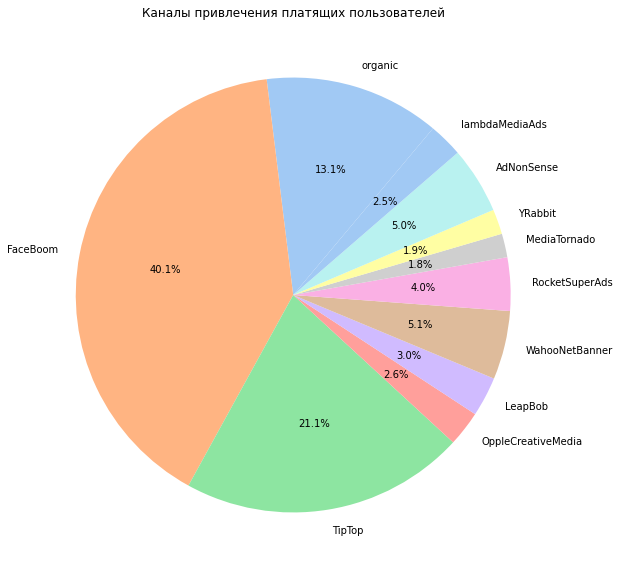

In [52]:
colors = sns.color_palette('pastel')[ 0:13 ]

fig1, ax1 = plt.subplots(figsize=(16,10))
ax1.pie(channel_payment['user_id'], labels=channel_payment.index, autopct='%1.1f%%', startangle=50,  colors = colors)
ax1.set_title('Каналы привлечения пользователей')


fig2, ax2 = plt.subplots(figsize=(16,10))
ax2.pie(channel_payment['payer'], labels=channel_payment.index, autopct='%1.1f%%', startangle=50, colors = colors)
ax2.set_title('Каналы привлечения платящих пользователей')
plt.show()

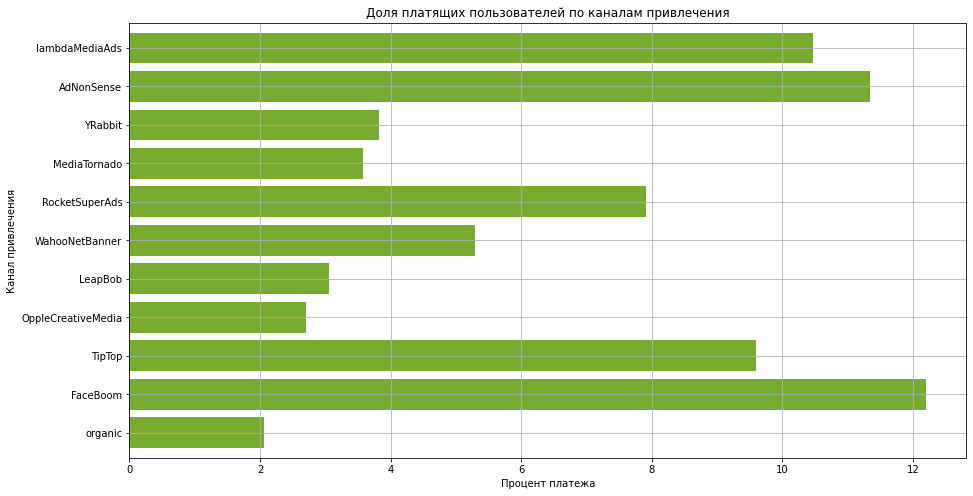

In [53]:
channel_payment['percent_payment'].plot(kind='barh', figsize=(15, 8), width=0.8, color='#77AC30')
plt.grid()
plt.xlabel('Процент платежа');
plt.ylabel('Канал привлечения');
plt.title('Доля платящих пользователей по каналам привлечения');

**Вывод:**

Больше всего пользователей органических - 37,6, пришедших не через рекламные источники.

С помощью рекламы больше всего пользователей пришли из FaceBoom - 19,4% и TipTop - 13%. Меньше всего пользователей из lambdaMediAds - 1,4%. Остальные каналы составляют 2-6%.

Процент платящих пользователей кординально отличается. Органические - 13,1 %. На первом месте FaceBoom - 40,1 %, затем TipTop - 21,1%.

Процент платящих пользователей от общего числа - FaceBoom - 12,2% , AdNonSense - 11,3%, lammbdaMediaAds - 10,5%.

**Источники OppleCreativeMedia,YRabbit,MediaTornado,LeapBob приближаются к значениям органического трафика.** 

**Вывод по исследовательскому анализу данных:**

Анализ данных показал, что основная доля пользователей из региона - США, привлечённые за счёт источников FaceBoom и TipTop, показывают неплохую конверсию, на фоне остальных источников.

При анализе окупаемости рекламных вложений стоит в первую очередь обратить внимание на этот пользовательский сегмент, поскольку он будет определять результаты (как преобладающий пользователей сегмент).

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

In [54]:
# Общая сумма расходов
costs.costs.sum()

105497.30000000002

In [55]:
# Расходы на каждый рекламный источник

#channel_costs = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
#channel_costs

#Допишу код с расчётом процентов

channel_costs = costs.groupby('channel').agg({'costs': 'sum'}).sort_values(by='costs', ascending=False)
total_costs = channel_costs['costs'].sum()
channel_costs['costs_percentage'] = (channel_costs['costs'] / total_costs) * 100
channel_costs


,costs,costs_percentage
channel,,
TipTop,54751.30,51.898295
FaceBoom,32445.60,30.754910
WahooNetBanner,5151.00,4.882589
AdNonSense,3911.25,3.707441
OppleCreativeMedia,2151.25,2.039152
RocketSuperAds,1833.00,1.737485
LeapBob,1797.60,1.703930
lambdaMediaAds,1557.60,1.476436
MediaTornado,954.48,0.904744


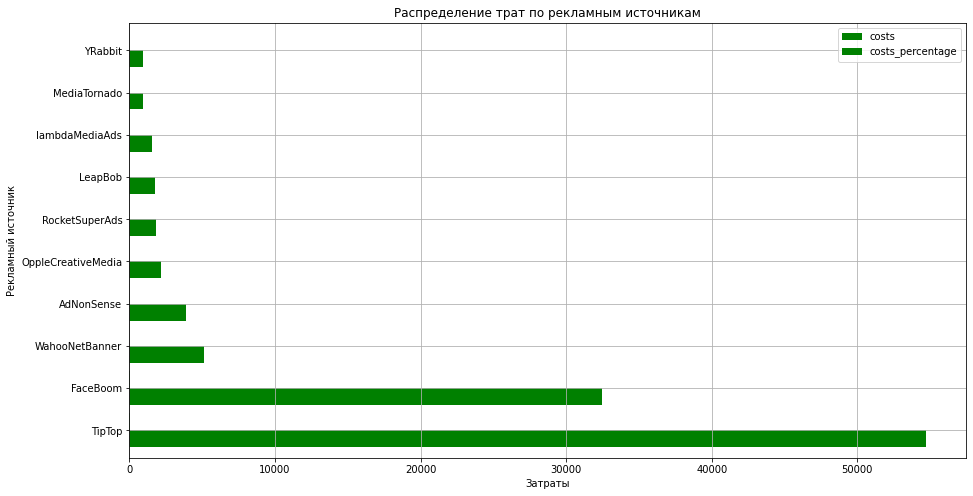

In [56]:
# Построим график для наглядности
channel_costs.plot(kind='barh', figsize=(15, 8), width=0.8, color='g')
plt.grid()
plt.xlabel('Затраты');
plt.ylabel('Рекламный источник');
plt.title('Распределение трат по рекламным источникам');


**Вывод:**

Больше всего затрад на рекламу TipTop - 54 751. На втором месте FaceBoom - 32 445, далее WahooNetBanner - 5 151.

Меньше всего расходов на рекламу на источник YRabbit - 944 $

Интересно, что через TipTop пришло меньше пользователей, чем через FaceBoom, а расходы на рекламу больше.

Затраты на рекламу на остальные источники  950 - 5 000 $

**Чуть болеше половины всех средств выделяется на TipTop. Если реклама не будет окупаться, стоит в первую очередь обратить внимание на TipTop и FaceBoom.**


In [57]:
# Создадим новые столбцы с месяцем и днём недели для дальнейшей визуализации
costs['dt'] = pd.to_datetime(costs['dt'])
costs['month'] = costs['dt'].dt.month
costs['week'] = costs['dt'].dt.isocalendar().week
costs.head()

,dt,channel,costs,month,week
0,2019-05-01,FaceBoom,113.3,5,18
1,2019-05-02,FaceBoom,78.1,5,18
2,2019-05-03,FaceBoom,85.8,5,18
3,2019-05-04,FaceBoom,136.4,5,18
4,2019-05-05,FaceBoom,122.1,5,18


In [58]:
costs.groupby(['channel','month']).agg({'costs': 'sum'})


costs
channel            month           
AdNonSense         5       1169.700
                   6        538.650
                   7        504.000
                   8        579.600
                   9        581.700
                   10       537.600
FaceBoom           5       3524.400
                   6       5501.100
                   7       5294.300
                   8       6274.400
                   9       6114.900
                   10      5736.500
LeapBob            5        140.280
                   6        314.580
                   7        313.530
                   8        369.810
                   9        343.980
                   10       315.420
MediaTornado       5        238.560
                   6        138.000
                   7        138.480
                   8        154.560
                   9        144.720
                   10       140.160
OppleCreativeMedia 5        169.750
                   6        370.000
                   7        366.500
                   8        439.250
                   9        427.750
                   10       378.000
RocketSuperAds     5        577.980
                   6        325.715
                   7        252.070
                   8        253.110
                   9        218.400
                   10       205.725
TipTop             5       2981.000
                   6       6675.600
                   7       8410.200
                   8      11202.000
                   9      13232.500
                   10     12250.000
WahooNetBanner     5        418.800
                   6        921.000
                   7        851.400
                   8       1040.400
                   9        977.400
                   10       942.000
YRabbit            5        299.700
                   6        106.200
                   7         97.380
                   8        124.740
                   9        152.790
                   10       163.410
lambdaMediaAds     5        458.400
                   6        199.200
                   7        219.200
                   8        220.000
                   9        247.200
                   10       213.600

In [59]:
costs.groupby(['channel','week']).agg({'costs': 'sum'})

costs
channel        week        
AdNonSense     18    211.05
               19    273.00
               20    265.65
               21    266.70
               22    202.65
...                     ...
lambdaMediaAds 39     80.00
               40     59.20
               41     60.80
               42     47.20
               43     53.60

[260 rows x 1 columns]

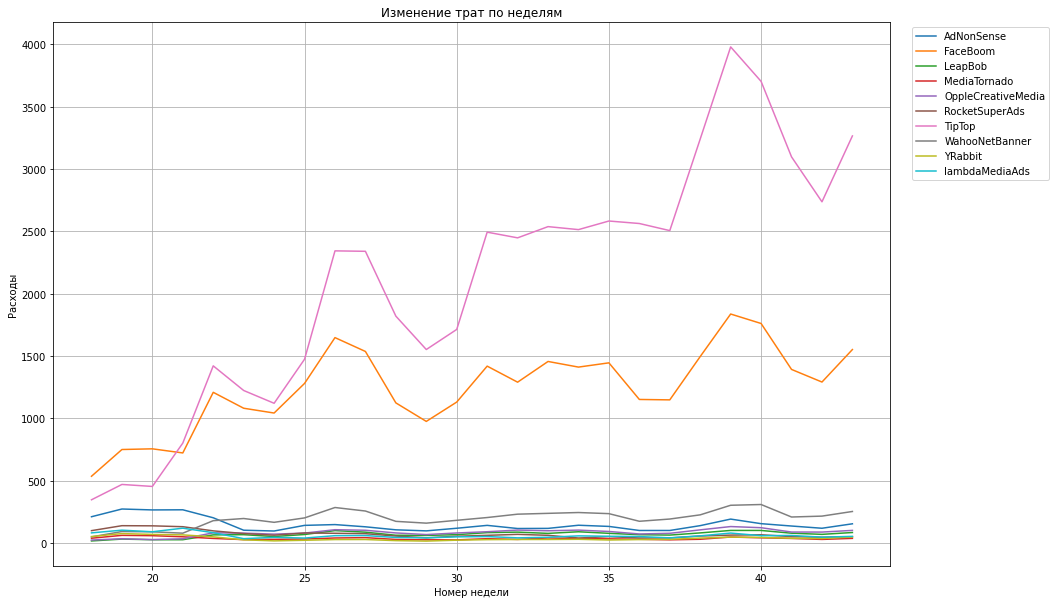

In [60]:
costs.pivot_table(
    index='week',  
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по неделям')
plt.xlabel('Номер недели')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

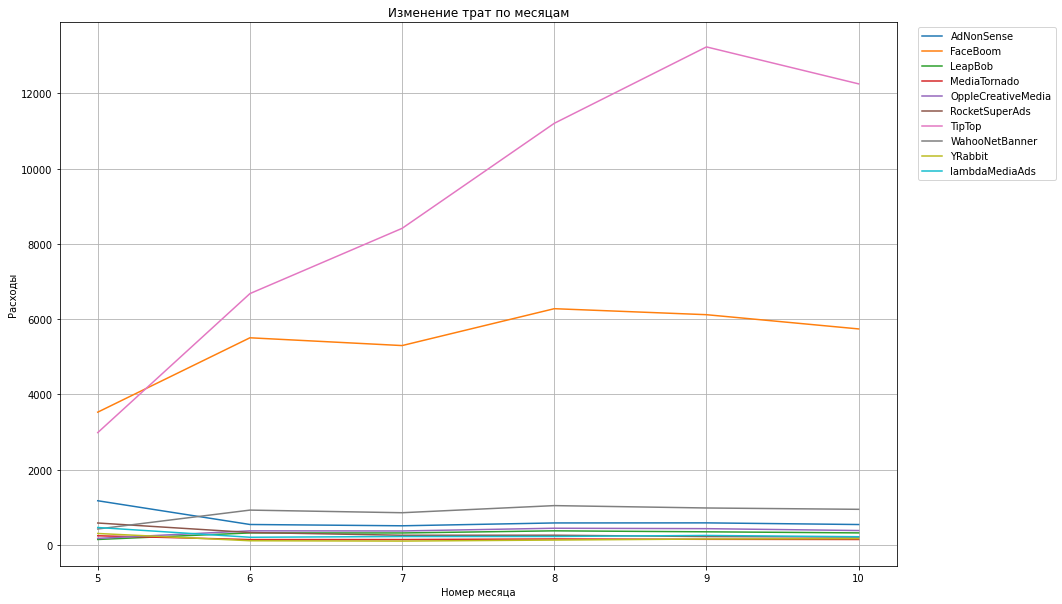

In [61]:
costs.pivot_table(
    index='month',  
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

Динамика изменения расходов на графике не наглядная, разобьём график на два, выделив отдельно TipTop и FaceBoom	

In [62]:
query_costs_1 = costs.query('channel in ["TipTop", "FaceBoom"]')
query_costs_1 = query_costs_1.groupby(['channel','month']).agg({'costs': 'sum'})
display(query_costs_1)
print('==========================================================')
query_costs_2 = costs.query('channel !=["TipTop", "FaceBoom"]')
query_costs_2 = query_costs_2.groupby(['channel','month']).agg({'costs': 'sum'})
display(query_costs_2)    

costs
channel  month         
FaceBoom 5       3524.4
         6       5501.1
         7       5294.3
         8       6274.4
         9       6114.9
         10      5736.5
TipTop   5       2981.0
         6       6675.6
         7       8410.2
         8      11202.0
         9      13232.5
         10     12250.0

costs
channel            month          
AdNonSense         5      1169.700
                   6       538.650
                   7       504.000
                   8       579.600
                   9       581.700
                   10      537.600
LeapBob            5       140.280
                   6       314.580
                   7       313.530
                   8       369.810
                   9       343.980
                   10      315.420
MediaTornado       5       238.560
                   6       138.000
                   7       138.480
                   8       154.560
                   9       144.720
                   10      140.160
OppleCreativeMedia 5       169.750
                   6       370.000
                   7       366.500
                   8       439.250
                   9       427.750
                   10      378.000
RocketSuperAds     5       577.980
                   6       325.715
                   7       252.070
                   8       253.110
                   9       218.400
                   10      205.725
WahooNetBanner     5       418.800
                   6       921.000
                   7       851.400
                   8      1040.400
                   9       977.400
                   10      942.000
YRabbit            5       299.700
                   6       106.200
                   7        97.380
                   8       124.740
                   9       152.790
                   10      163.410
lambdaMediaAds     5       458.400
                   6       199.200
                   7       219.200
                   8       220.000
                   9       247.200
                   10      213.600

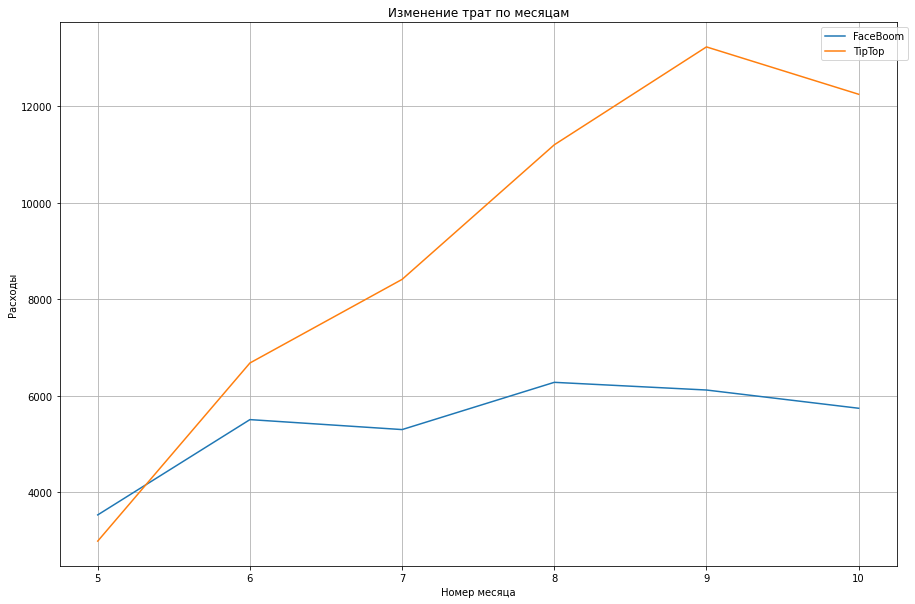

In [63]:
query_costs_1.pivot_table(
    index='month',  
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

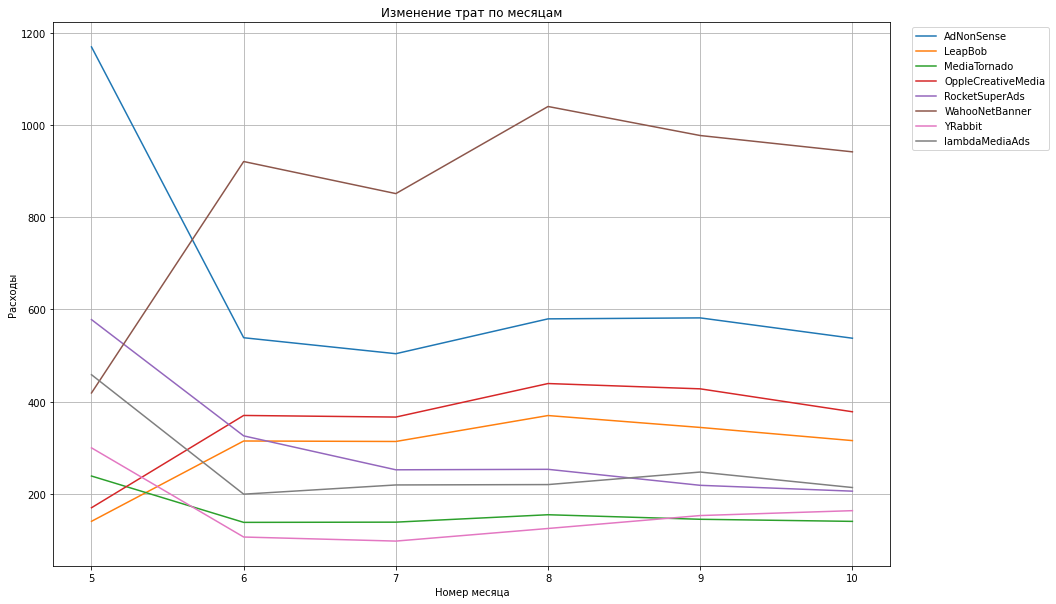

In [64]:
query_costs_2.pivot_table(
    index='month',  
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по месяцам')
plt.xlabel('Номер месяца')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

Проделаем то же самое для расходов по неделям

In [65]:
query_costs_3 = costs.query('channel in ["TipTop", "FaceBoom"]')
query_costs_3 = query_costs_3.groupby(['channel','week']).agg({'costs': 'sum'})
display(query_costs_3)
print('==========================================================')
query_costs_4 = costs.query('channel !=["TipTop", "FaceBoom"]')
query_costs_4 = query_costs_4.groupby(['channel','week']).agg({'costs': 'sum'})
display(query_costs_4)  

costs
channel  week        
FaceBoom 18     535.7
         19     750.2
         20     755.7
         21     722.7
         22    1208.9
         23    1081.3
         24    1042.8
         25    1280.4
         26    1647.8
         27    1536.7
         28    1124.2
         29     975.7
         30    1130.8
         31    1419.0
         32    1290.3
         33    1456.4
         34    1411.3
         35    1445.4
         36    1151.7
         37    1148.4
         38    1496.0
         39    1837.0
         40    1761.1
         41    1392.6
         42    1291.4
         43    1552.1
TipTop   18     347.0
         19     470.0
         20     454.0
         21     801.8
         22    1421.2
         23    1223.6
         24    1121.0
         25    1474.4
         26    2343.6
         27    2340.0
         28    1820.0
         29    1552.2
         30    1713.4
         31    2493.6
         32    2448.0
         33    2538.0
         34    2514.0
         35    2583.0
         36    2563.0
         37    2506.0
         38    3241.0
         39    3979.5
         40    3703.0
         41    3097.5
         42    2737.0
         43    3265.5

costs
channel        week        
AdNonSense     18    211.05
               19    273.00
               20    265.65
               21    266.70
               22    202.65
...                     ...
lambdaMediaAds 39     80.00
               40     59.20
               41     60.80
               42     47.20
               43     53.60

[208 rows x 1 columns]

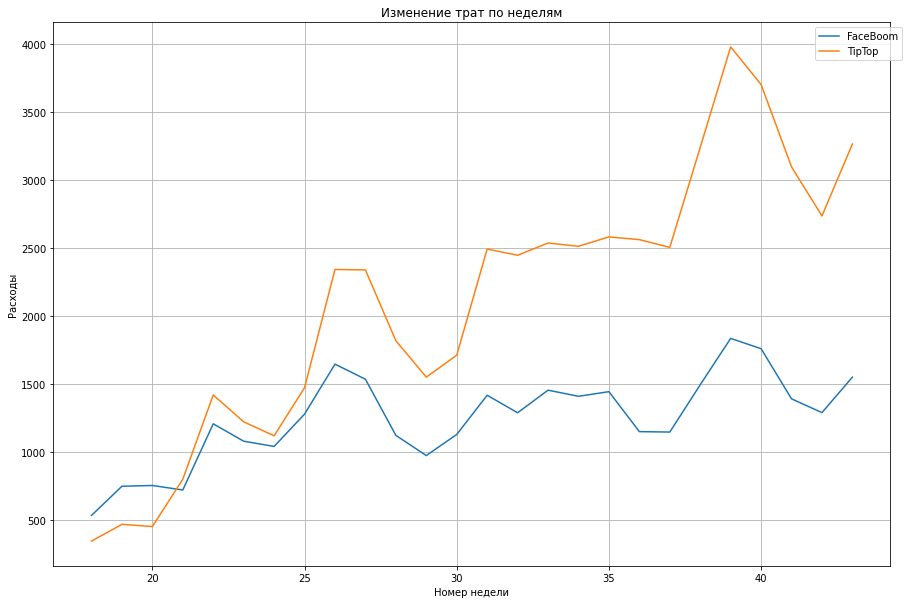

In [66]:
query_costs_3.pivot_table(
    index='week',  
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по неделям')
plt.xlabel('Номер недели')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

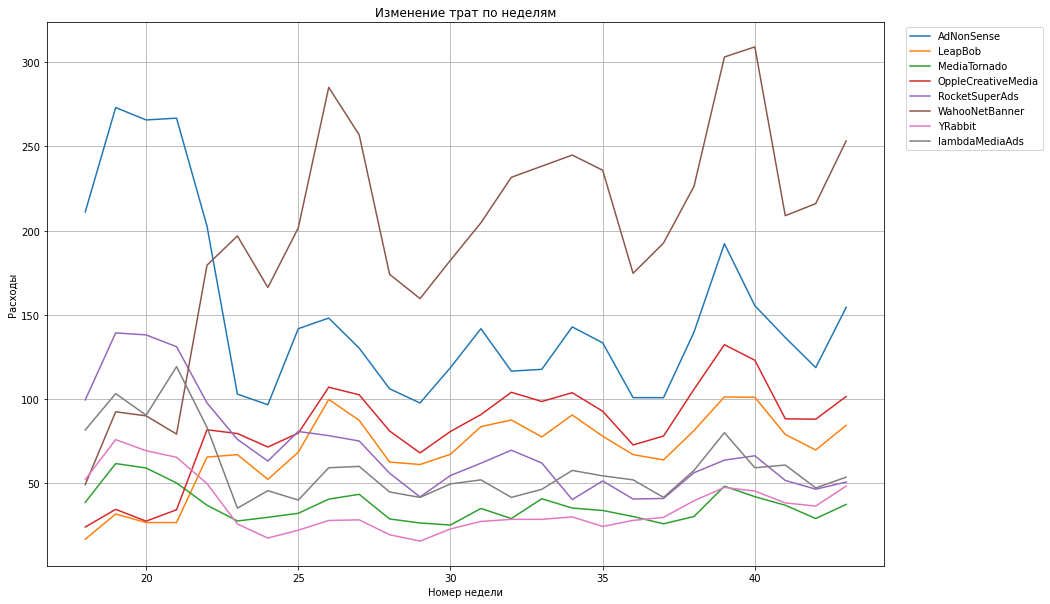

In [67]:
query_costs_4.pivot_table(
    index='week',  
    columns='channel',  
    values='costs',  
    aggfunc='sum',  
).plot(figsize=(15, 10), grid=True)

plt.title('Изменение трат по неделям')
plt.xlabel('Номер недели')
plt.ylabel('Расходы')
plt.legend(bbox_to_anchor=(1.02, 1.0), loc='best')
plt.show()

**Вывод**

Наибольшие ежемесячные и еженедельные расходы составляют у каналов TipTop и  FaceBoom.

За 6 месяцев расходы FaceBoom - 32 445,6,  TipTop - 54 751,3 Расходы на TipTop растут ежемесячно.

В июне наблюдается сокращение расходов на рекламу для большинства источников. 

Расходы на  WahooNetBanner в среднем составляют 600 - 1000

На остальные рекламные источники в среднем не тратится больше 600 ежемесячно




In [68]:
# Средняя стоимость привлечения одного пользователя

mean_cost = profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).sort_values(by='acquisition_cost', ascending=False)
display(mean_cost)

,acquisition_cost
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


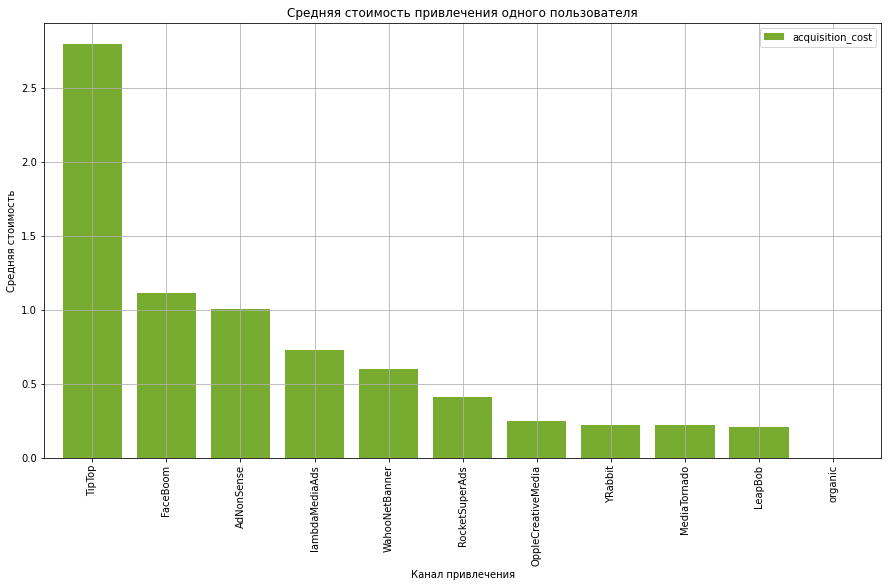

In [69]:
#Построим график для наглядности

mean_cost.plot(kind='bar', figsize=(15, 8), width=0.8, color='#77AC30')
plt.grid()
plt.xlabel('Канал привлечения');
plt.ylabel('Средняя стоимость');
plt.title('Средняя стоимость привлечения одного пользователя');


**Вывод:**

Самое дорогое привлечение пользователей через TipTop - 2,5$. 

На втором месте FaceBoom, далее AdNonSense около 1$. т.к на organic не выделяются дс на привлечение, этот показатель = 0.

Привлечение остальных пользователей момтавляет менее 1$



**Вывод по маркетинговому исследованию:**

Общая сумма расходов на рекламу составила - 105497.30.

Основные затраты были совершены на два источника - TipTop и FaceBoom, при этом это самые дорогие источники по стоимости привлечения пользователя. 

Нужно проверить, на сколько это было оптимально. 
    

### Оцените окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

In [70]:
# т.к. на organic не затрачиваются средства на рекламу, исключим их из анализа.

profiles = profiles.query('channel != "organic"')

# момент анализа
observation_date = datetime(2019, 11, 1).date()

# горизонт анализа 
horizon_days = 14

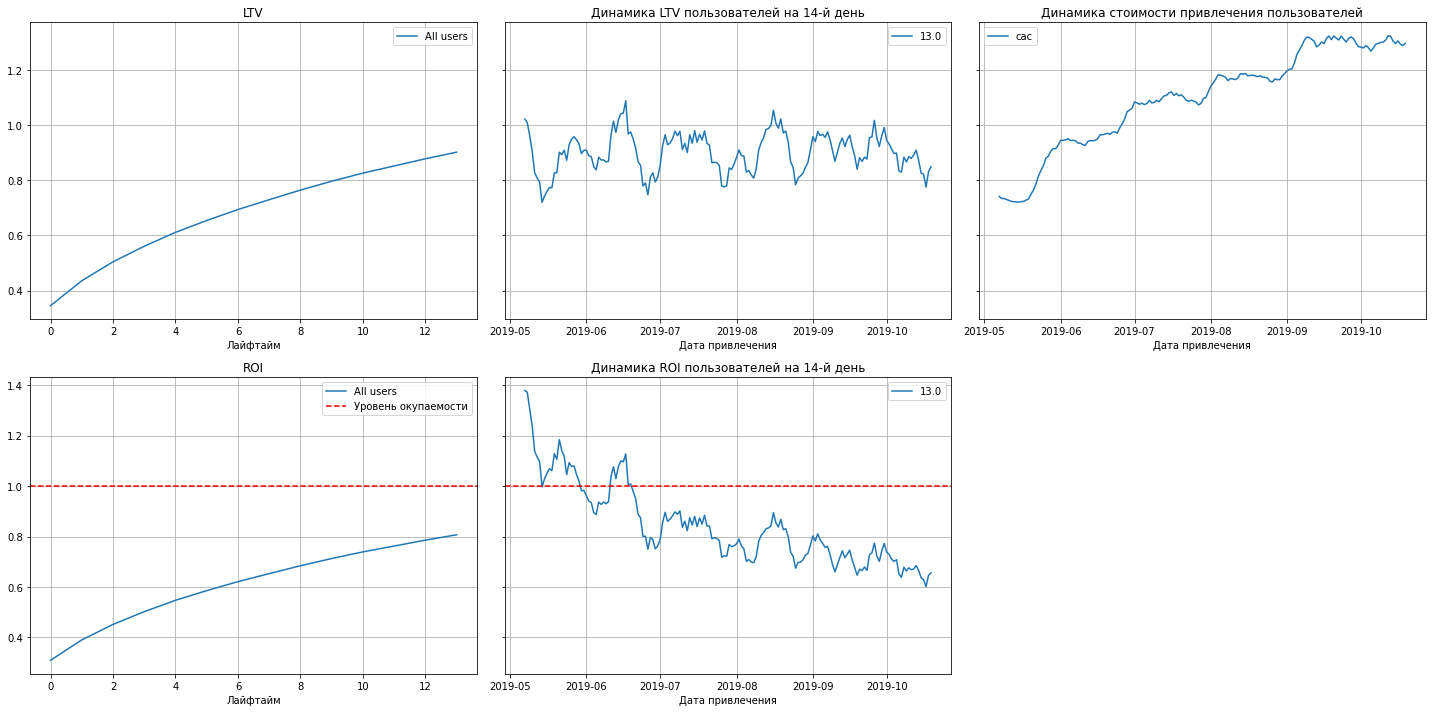

In [71]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

**По графикам можно сделать такие выводы:**

- Реклама не окупается. ROI в конце второй недели — чуть выше 80%.
- CAC стабильно растёт.
- LTV  показатель достаточно стабилено растёт. Значит, дело не в ухудшении качества пользователей.
- ROI стабильно идёт вниз.
- Динамика стоимости привлечения пользователей постепенно увеличивается. 

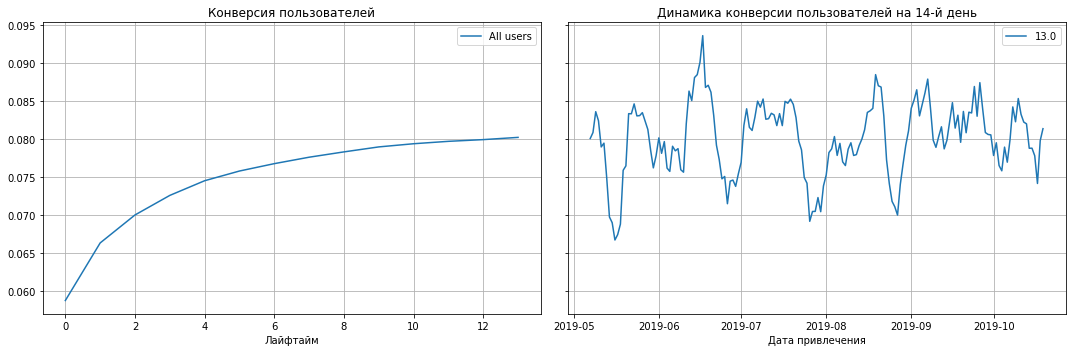

In [72]:
# смотрим конверсию 

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

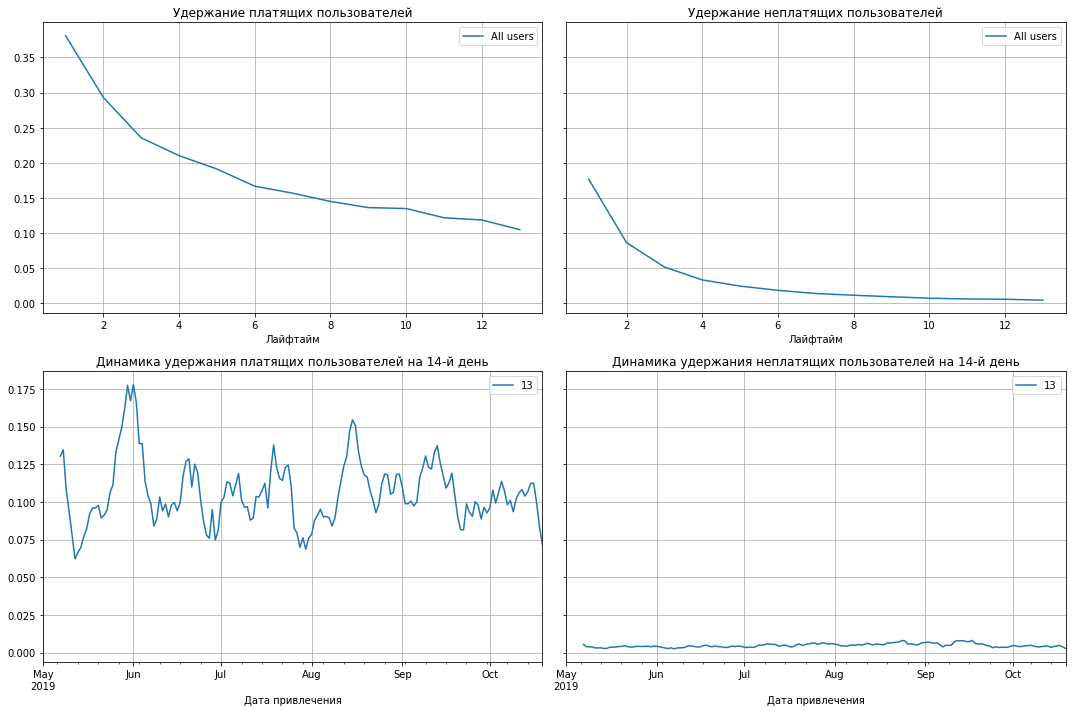

In [73]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days)  

**Вывод**

Конверсия немного растёт. Пользователи конвертируются хорошо в первые 3-4 дня. 

Удержание платящих пользователей в первый день чуть больше 35%. К концу второй недели чуть больше 10%.

Динамика удержания платящих пользователей максимальна в июне - около 17%. К концу второй недели остаётся около 7% пользователей.

Не платящие пользователи не задерживаются после первого дня. 

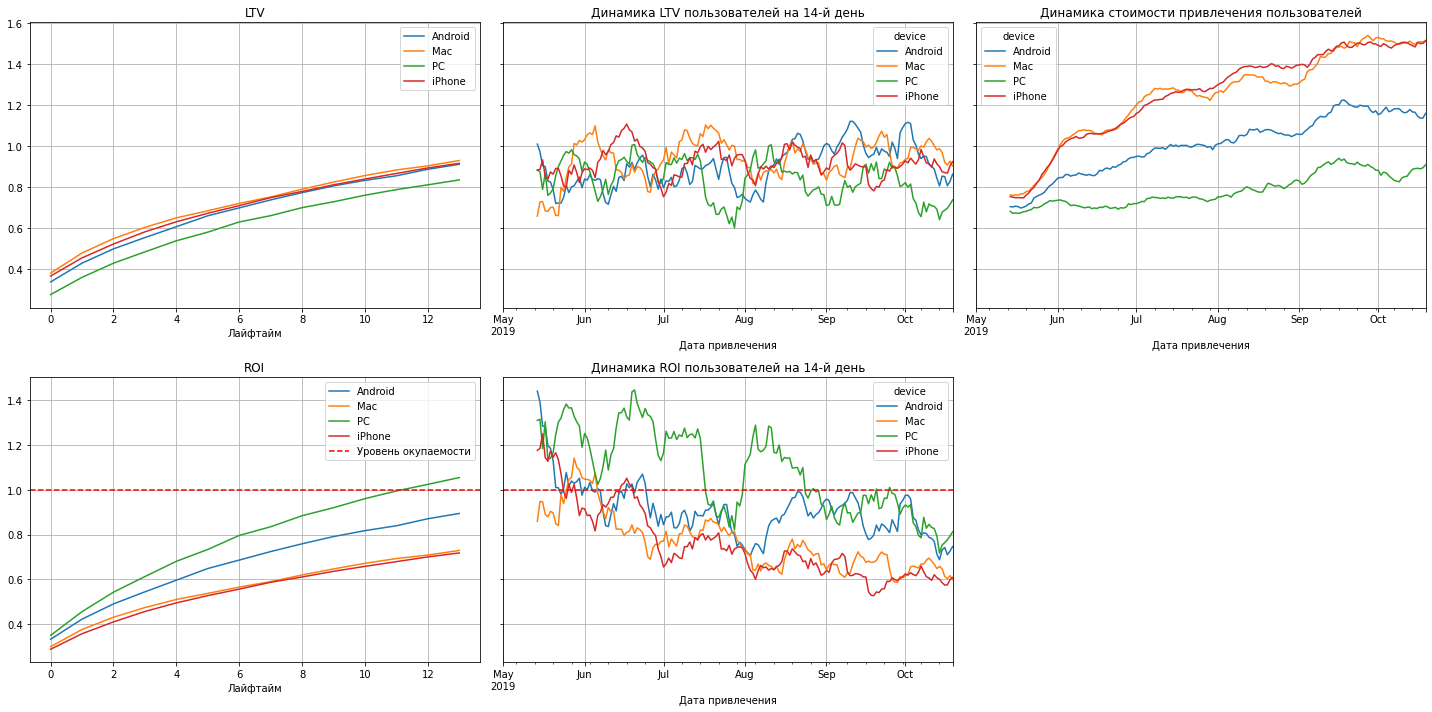

In [74]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**

- LTV пользователей всех устроиств стабильно растёт.
- Пользователи PC окупаются дольше остальных. В мае окупались все пользователи, с сентября окупаемость ушла в минус. 
- Расходы у iPhone и Mac выше чем у Android и PC. У PC наименьшие расходы, что повлияло на окупаемость. 

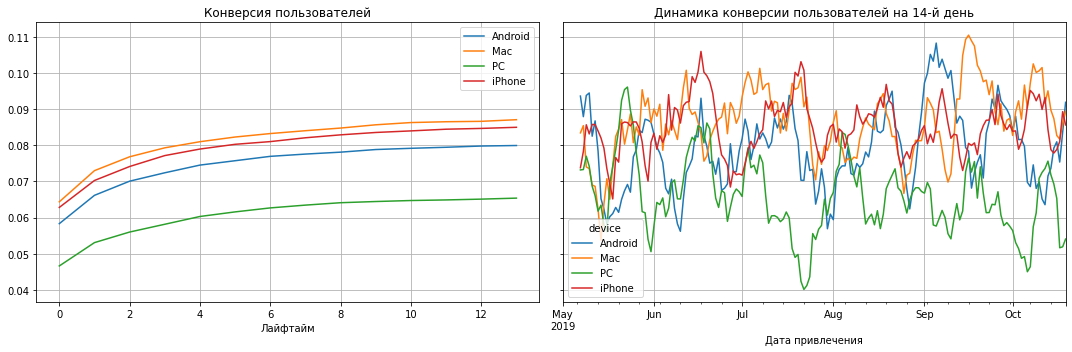

In [75]:
# смотрим конверсию с разбивкой по устройствам

dimensions = ['device']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:**

Судя по графикам, пользователи Mac,  iPhone и Android конвертируются лучше и постоянно, чем PC.

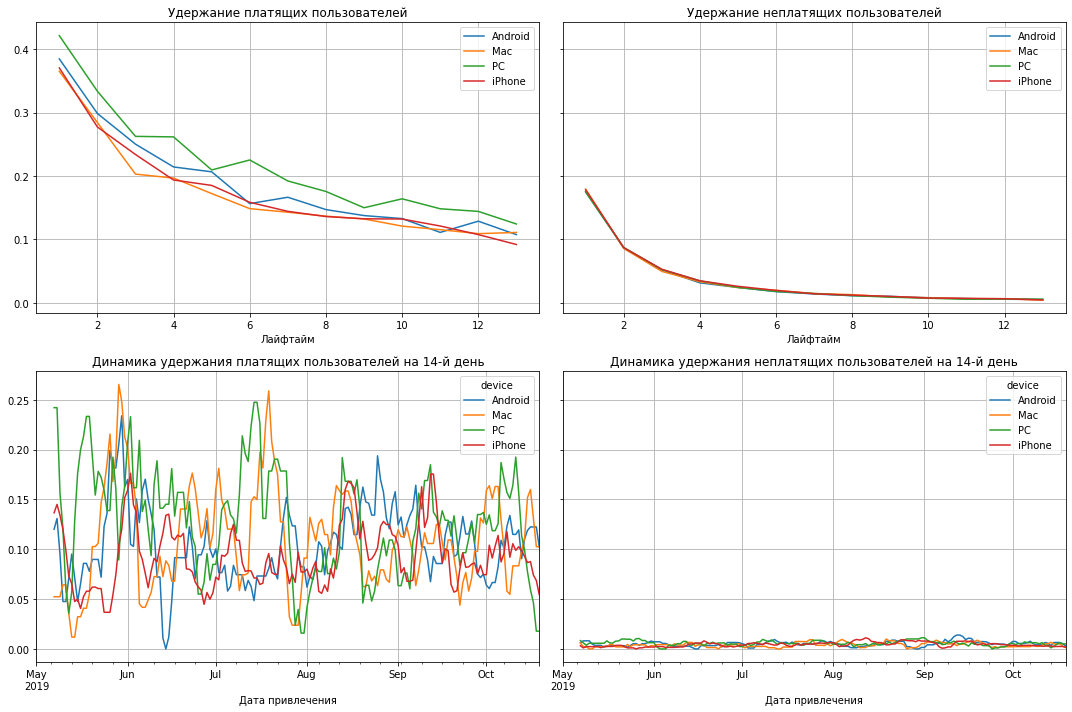

In [76]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**

Пользователи стабильно плохо удерживаются. Для платящих пользователей на PC удежание на конец второй недели ниже, чем на остальных устройствах. 

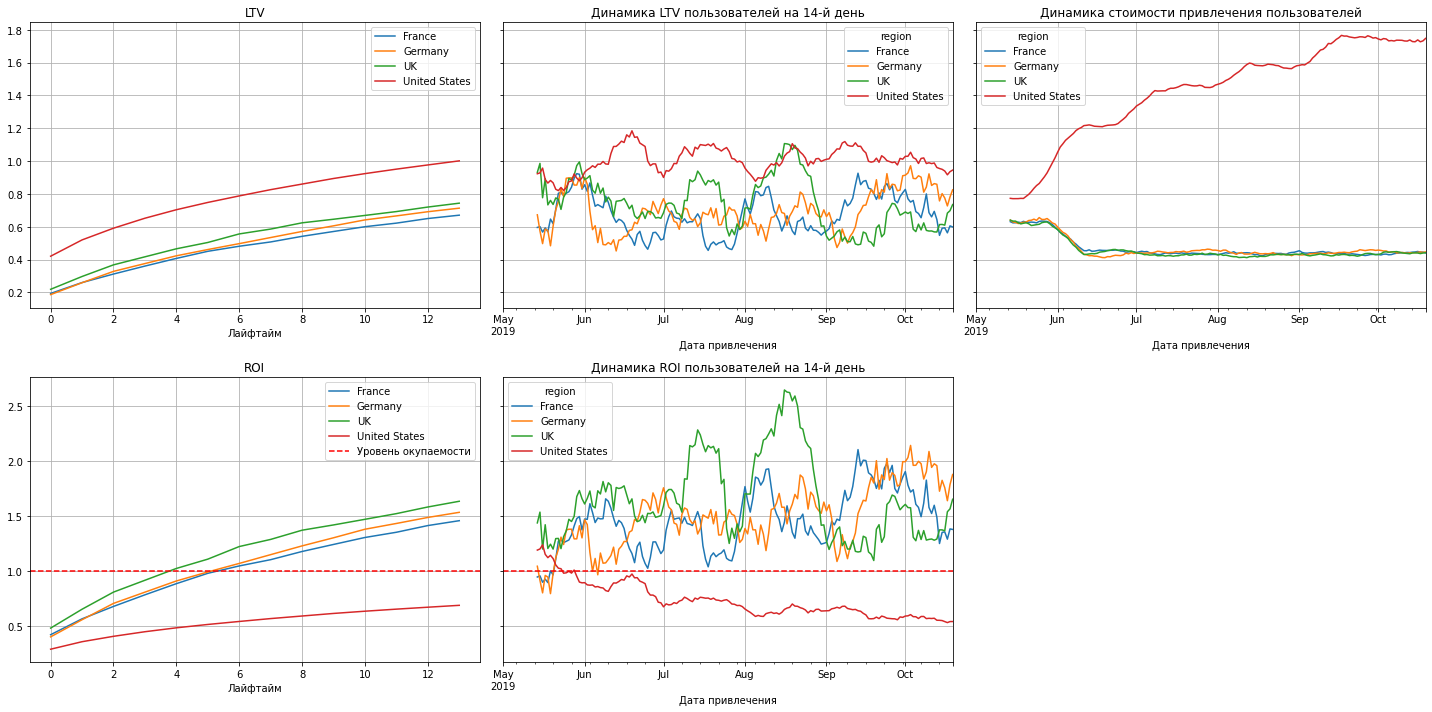

In [77]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**

- Реклама не окупается в США.Остальные страны окупились давально быстро.
- Стоимость привлечения для пользователей США огромны, в то время как для остальных 4 стран всё стабильно. В июне было уменьшение расходов для Франции, Германии и Великобритании и кардинальное увеличение для США.
- LTV подвержена сезонностию LTV у США выше, чем в других странах.
- Лучше всего окупается Великобританя.

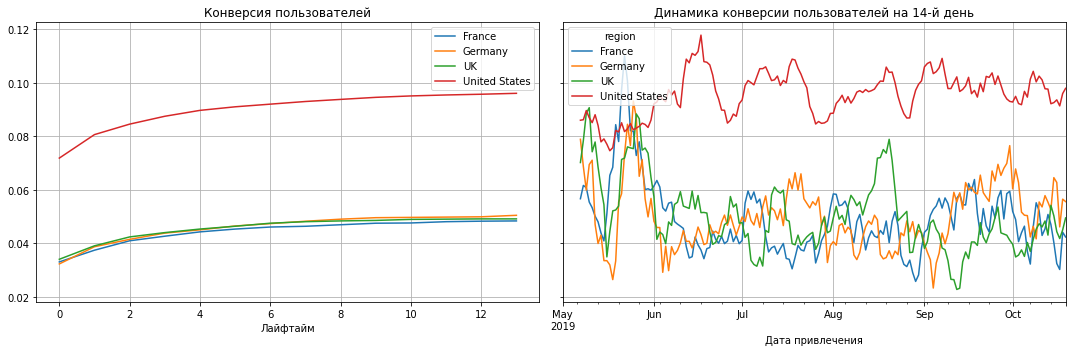

In [78]:
# смотрим конверсию с разбивкой по странам

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:**

Пользователи из США конвертируются очень хорошо. На динамике видно, что до июня, когда изменили расходы на рекламу, конверсия остальных стран была выше, чем у США. 

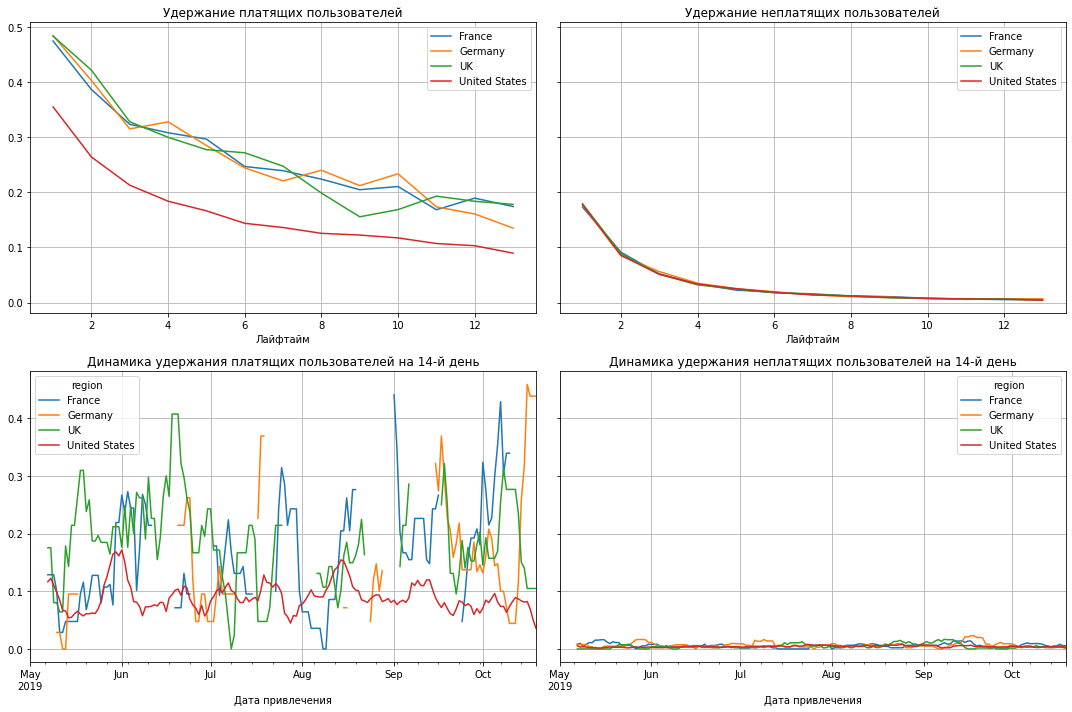

In [79]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**

Пользователи из США стабильно плохо удерживаются, в связи с чем, большие расходы на рекламу. 
У наплатящих пользователей всё стабильно, удержание на одинь день.


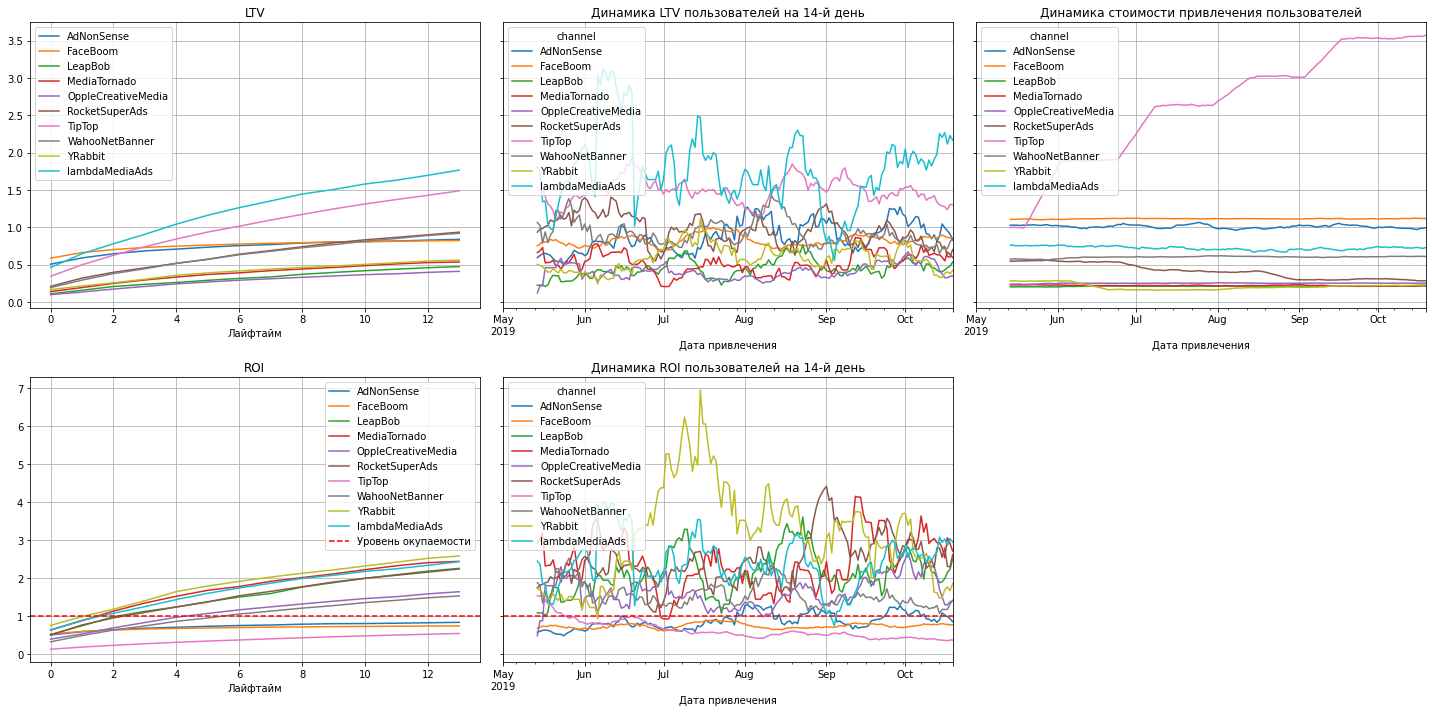

In [80]:
# смотрим окупаемость с разбивкой по источникам привлечения

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

**Вывод:**

Динамика стоимости привлечения пользователей выше всего у TipTop. Но этот источник привлечения и не окупается. Так же не окупаются FaceBoom и LeapBob.

Хорошо окупаются YRabbit, lambdaMediaAds и MediaTornado.

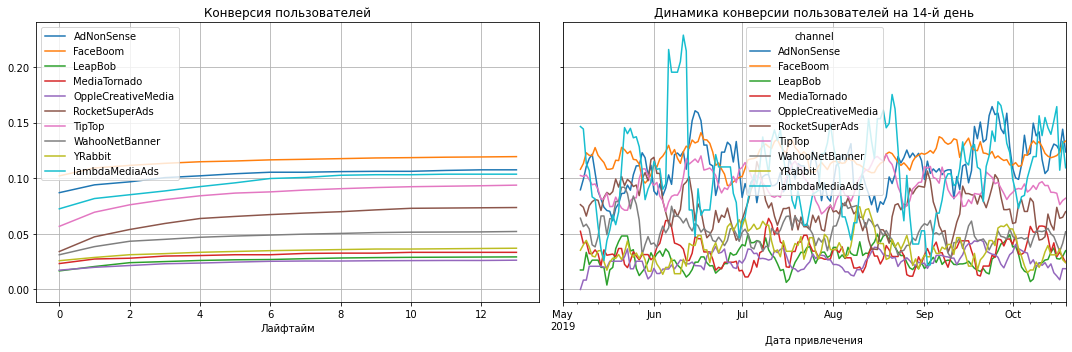

In [81]:
# смотрим конверсию с разбивкой по источникам привлечения

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

**Вывод:**

Хуже всего конерсия у OppleCreativeMedia, лучше всего у FaceBoom.

Резкие скачки в динамике у lambdaMediaAds.

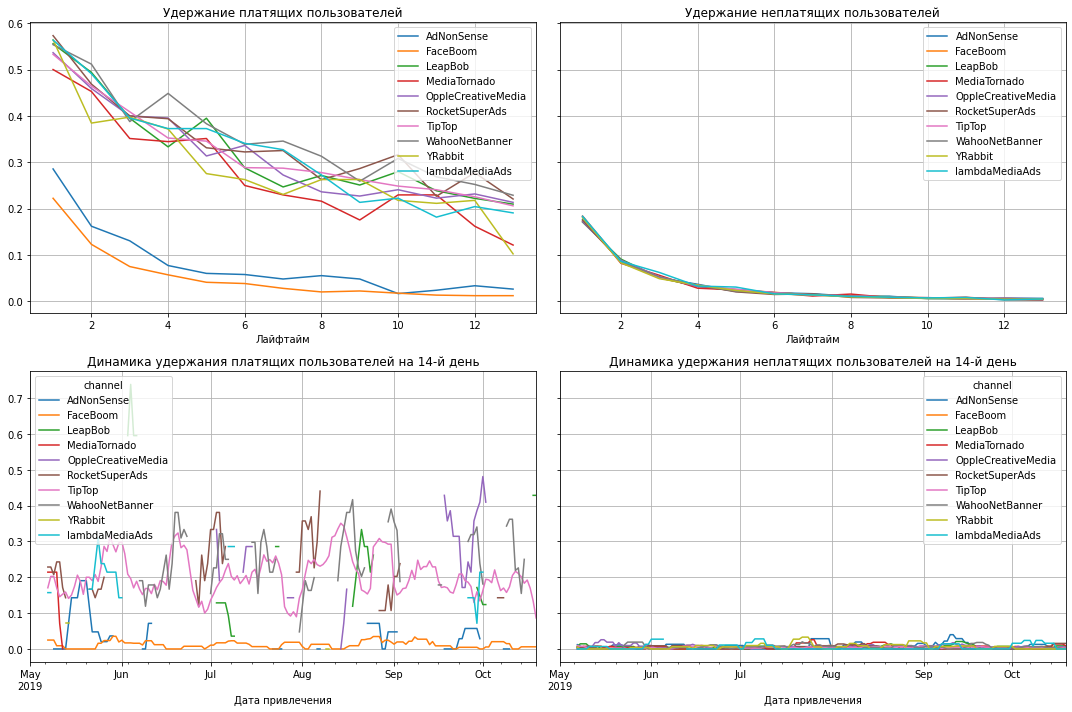

In [82]:
# смотрим удержание с разбивкой по источникам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

**Вывод:**

Пользователи из FaceBoom и  AdNoneSense удерживаются хуже остальных. Из остальных источников удержание стабильно снижается. К концу второй недели чуть ниже 30%.

### Напишите выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

Проанализированы данные по пользователям приложения Procrastinate Pro+.
Пользователи из США, Франции, Германии и Великобритании.
Максимальная доля пользователей использует iPhone - 36.3 %. Пользователи с устройствами Android, PC и Mac составляют - 20-23,4 %
С помощью рекламы больше всего пользователей пришло из FaceBoom - 19,4% и TipTop - 13%

**Причины неэффективности привлечения пользователей:**
- Большие расходы на рекламу для польхователей США, которая не окупилась, при этом удержание платящих пользователей стабильно снижается с каждым месяцем. 
- Большие расходы для пользователи из FaceBoom и TipTop, которые так же не окупились.

Два источника, на которые были выделены основные средства рекламного бюджета - не окупаются.  TipTop не окупается по причине постоянного увеличения затрат из-за увеличения стоимости привлечения пользователей на фоне стабильного LTV. FaceBoom - низкое удержание пользователей. 

Остальные сегменты, в разрезе по регионам, окупаются - Франция, Германия и Великобритания.

Основная проблема с плохой окупаемостью рекламы не связана с типом устройства, т.к. нет каких-то резких изменений в окупаемости различных устройств.

**Рекомендации для отдела маркетинга:**
- Снизить расходы на рекламу источников TipTop и FaceBoom.
- Стоит вложить средства в источники, которые показывают хорошие показатели по окупаемости и удержанию пользователей - lambdaMediaAds и возможно YRabbit. 

